# Rodrigo_Mesquita_DR3_AT
## Desenvolvimento Front-End com Python (com Streamlit) [24E3_1]

#### Notebook disponível em: https://github.com/rodrigo1992-cmyk/DR1_AT

#### Deploy do App disponível em: 

In [ ]:
streamlit run app.py --server.port=8086 --browser.serverAddress='177.192.12.238

## 1. Preparar o ambiente de desenvolvimento:
* Crie um ambiente virtual para seu projeto utilizando uma ferramenta como venv, virtualenv ou pipenv.
* Instale as bibliotecas necessárias (Streamlit, statsbombpy, mplsoccer, matplotlib, entre outras).

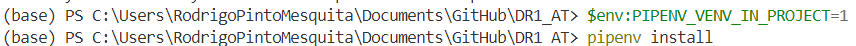

## 2. Estruturar o projeto:
* Crie um repositório no GitHub para hospedar o código do seu projeto.
* Garanta que o repositório contenha um arquivo requirements.txt com as dependências necessárias para rodar o projeto.
* Organize o código de forma clara, criando funções separadas para carregar os dados, gerar as visualizações e construir a interface do dashboard.

In [ ]:
# Repositório Github: https://github.com/rodrigo1992-cmyk/DR1_AT

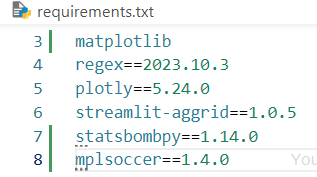

## 3. Definir a estrutura do dashboard:
* Desenvolva uma interface interativa em Streamlit que permita ao usuário selecionar:
  * Um campeonato específico.
  * Uma temporada (ano).
  * Uma partida ou jogador para análise.
* Organize o layout do dashboard em colunas, usando columns, sidebars, containers e tabs para melhorar a usabilidade.

In [33]:
%%writefile app.py

import pandas as pd
import streamlit as st
from statsbombpy import sb

def filtros_barra_lateral():
    st.sidebar.header('Filtros')

    df_camp = sb.competitions()

    filtro_partida, df_partidas_filtrado, df_eventos = 'Selecione', pd.DataFrame(), pd.DataFrame()

    #Crio a lista de campeonatos
    lista_camp = df_camp['competition_name'].drop_duplicates().tolist()
    lista_camp.insert(0, 'Selecione')

    #Crio o Seletor
    filtro_camp = st.sidebar.selectbox('Filtrar Campeonato', lista_camp)

    #Aplico a condição para só filtrar se houver seleção
    if filtro_camp != 'Selecione':
        df_camp = df_camp.loc[df_camp['competition_name'] == filtro_camp]

        #lista dos anos
        lista_ano = df_camp['season_name'].drop_duplicates().tolist()
        lista_ano.insert(0, 'Selecione')
        #seletor de ano
        filtro_ano = st.sidebar.selectbox('Filtrar Ano', lista_ano)

        if filtro_ano != 'Selecione':
            df_camp = df_camp.loc[df_camp['season_name'] == filtro_ano]
            
            #Obtem o Dataset Partidas passando como parâmetro o id do campeonato e o id da temporada    
            df_partidas = sb.matches(competition_id=df_camp['competition_id'].values[0], season_id=df_camp['season_id'].values[0])

            #lista das partidas
            df_partidas['partida'] = df_partidas['home_team'] + ' x ' + df_partidas['away_team']
            lista_partidas = df_partidas['partida'].drop_duplicates().tolist()
            lista_partidas.insert(0, 'Selecione')
            #seletor de partidas
            filtro_partida = st.sidebar.selectbox('Filtrar Partida', lista_partidas)

            if filtro_partida != 'Selecione':
                df_partidas_filtrado = df_partidas.loc[df_partidas['partida'] == filtro_partida]

                #Obtem o Dataset Eventos passando como parâmetro o id da partida
                df_eventos = sb.events(match_id=df_partidas_filtrado['match_id'].values[0])

    return filtro_partida, df_partidas_filtrado, df_eventos

def tabelas_pg_partida(df_eventos):
    st.write('Dados da Partida')
    st.dataframe(df_partidas_filtrado)
    st.write('Eventos na Partida')
    st.dataframe(df_eventos)


######################################  INICIA O APLICATIVO ######################################
filtro_partida, df_partidas_filtrado, df_eventos = filtros_barra_lateral()
if filtro_partida != 'Selecione':
    tab_graf, tab_tabelas = st.tabs(['Gráficos', 'Tabelas'])
    with tab_tabelas:
        tabelas_pg_partida(df_eventos)
    


Overwriting app.py


## 4. Obter dados e exibir informações básicas
* Use a biblioteca StatsBombPy para carregar dados de competições, temporadas, partidas e jogadores.
* Mostre, em uma página do dashboard, as seguintes informações:
* Nome da competição, temporada e partida selecionada.
* Estatísticas básicas da partida (gols, chutes, passes, etc.).
* Um DataFrame exibindo os eventos da partida, como passes, finalizações e desarmes.

In [96]:
%%writefile app.py

import pandas as pd
import streamlit as st
from statsbombpy import sb

def filtros_barra_lateral():
    st.sidebar.header('Filtros')

    df_camp = sb.competitions()

    filtro_camp, filtro_ano, filtro_partida, df_partidas_filtrado, df_eventos = 'Selecione','Selecione','Selecione', pd.DataFrame(), pd.DataFrame()

    #Crio a lista de campeonatos
    lista_camp = df_camp['competition_name'].drop_duplicates().tolist()
    lista_camp.insert(0, 'Selecione')

    #Crio o Seletor
    filtro_camp = st.sidebar.selectbox('Filtrar Campeonato', lista_camp)

    #Aplico a condição para só filtrar se houver seleção
    if filtro_camp != 'Selecione':
        df_camp = df_camp.loc[df_camp['competition_name'] == filtro_camp]

        #lista dos anos
        lista_ano = df_camp['season_name'].drop_duplicates().tolist()
        lista_ano.insert(0, 'Selecione')
        #seletor de ano
        filtro_ano = st.sidebar.selectbox('Filtrar Ano', lista_ano)

        if filtro_ano != 'Selecione':
            df_camp = df_camp.loc[df_camp['season_name'] == filtro_ano]
            
            #Obtem o Dataset Partidas passando como parâmetro o id do campeonato e o id da temporada    
            df_partidas = sb.matches(competition_id=df_camp['competition_id'].values[0], season_id=df_camp['season_id'].values[0])

            #lista das partidas
            df_partidas['partida'] = df_partidas['home_team'] + ' x ' + df_partidas['away_team']
            df_partidas['resultado'] = df_partidas['home_score'].astype(str) + ' x ' + df_partidas['away_score'].astype(str)
            lista_partidas = df_partidas['partida'].drop_duplicates().tolist()
            lista_partidas.insert(0, 'Selecione')
            #seletor de partidas
            filtro_partida = st.sidebar.selectbox('Filtrar Partida', lista_partidas)

            if filtro_partida != 'Selecione':
                df_partidas_filtrado = df_partidas.loc[df_partidas['partida'] == filtro_partida]

                #Obtem o Dataset Eventos passando como parâmetro o id da partida
                df_eventos = sb.events(match_id=df_partidas_filtrado['match_id'].values[0])
            
    return filtro_camp, filtro_ano, filtro_partida, df_partidas_filtrado, df_eventos

def tabelas_pg_partida(df_partidas_filtrado, df_eventos):
    st.write('Dados da Partida')
    df_temp_partida = df_partidas_filtrado[['partida','resultado','match_date','competition_stage','stadium']]
    st.dataframe(df_partidas_filtrado)

    st.write('Eventos na Partida')
    df_temp_eventos =df_eventos[['second','type','player','team','pass_height','pass_recipient','pass_outcome','shot_type','shot_outcome','interception_outcome']]
    st.dataframe(df_temp_eventos)
    
def resumo_selecao(df_partidas_filtrado, df_eventos):
    #Exibe um resumo dos filtros selecionados
    
    texto_selecao = 'ESCOLHA UMA PARTIDA PARA VISUALIZAR'
    
    if filtro_camp != 'Selecione':
    
        st.write('### SELEÇÃO REALIZADA')
        texto_selecao = filtro_camp
        
        if filtro_ano != 'Selecione':
            texto_selecao = filtro_camp + " > " + filtro_ano
            if filtro_partida != 'Selecione':
                texto_selecao = filtro_camp + " > " + filtro_ano + " > " + filtro_partida

    st.write(f'#### {texto_selecao}')

    if filtro_partida != 'Selecione':
        #Exibe um resumo da partida selecionada
        count_chutes = df_eventos.loc[df_eventos['type'] == 'Shot'].shape[0]
        count_passes = df_eventos.loc[df_eventos['type'] == 'Pass'].shape[0]

        col_1, col_2, col_3 = st.columns(3)
        with col_1:
            st.write(f'#### RESULTADO {df_partidas_filtrado['resultado'].values[0]}')
        with col_2:
            st.write(f'#### {count_chutes} CHUTES')
        with col_3:
            st.write(f'#### {count_passes} PASSES')

    #Exibe um resumo dos dados da partida


######################################  INICIA O APLICATIVO ######################################
filtro_camp, filtro_ano, filtro_partida, df_partidas_filtrado, df_eventos = filtros_barra_lateral()
resumo_selecao(df_partidas_filtrado, df_eventos)

if filtro_partida != 'Selecione':
    tab_graf, tab_tabelas = st.tabs(['Gráficos', 'Tabelas'])
        
    with tab_tabelas:
        tabelas_pg_partida(df_partidas_filtrado,df_eventos)
    


Overwriting app.py


## 5. Criar visualizações de dados
* Utilize a biblioteca mplsoccer para gerar um mapa de passes e mapa de chutes para uma partida específica. Garanta que o gráfico seja  interativo, com legendas e informações que ajudem a interpretar os dados.
* Crie visualizações adicionais com Matplotlib e Seaborn para explorar relações entre as estatísticas de uma partida ou de um jogador (por exemplo, relação entre número de passes e gols).
* Utilize a biblioteca mplsoccer para novas visualizações de acordo com sua galeria (https://mplsoccer.readthedocs.io/en/latest/gallery/index.html)

In [189]:
%%writefile app.py

import pandas as pd
import streamlit as st
from statsbombpy import sb
from mplsoccer import Pitch, FontManager, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

st.set_page_config(layout="wide")

def filtros_barra_lateral():
    st.sidebar.header('Filtros')

    df_camp = sb.competitions()

    filtro_camp, filtro_ano, filtro_partida, filtro_id_partida = 'Selecione','Selecione','Selecione', 0
    df_partidas_filtrado, df_eventos = pd.DataFrame(), pd.DataFrame()

    #Crio a lista de campeonatos
    lista_camp = df_camp['competition_name'].drop_duplicates().tolist()
    lista_camp.insert(0, 'Selecione')

    #Crio o Seletor
    filtro_camp = st.sidebar.selectbox('Filtrar Campeonato', lista_camp)

    #Aplico a condição para só filtrar se houver seleção
    if filtro_camp != 'Selecione':
        df_camp = df_camp.loc[df_camp['competition_name'] == filtro_camp]

        #lista dos anos
        lista_ano = df_camp['season_name'].drop_duplicates().tolist()
        lista_ano.insert(0, 'Selecione')
        #seletor de ano
        filtro_ano = st.sidebar.selectbox('Filtrar Ano', lista_ano)

        if filtro_ano != 'Selecione':
            df_camp = df_camp.loc[df_camp['season_name'] == filtro_ano]
            
            #Obtem o Dataset Partidas passando como parâmetro o id do campeonato e o id da temporada    
            df_partidas = sb.matches(competition_id=df_camp['competition_id'].values[0], season_id=df_camp['season_id'].values[0])

            #lista das partidas
            df_partidas['partida'] = df_partidas['home_team'] + ' x ' + df_partidas['away_team']
            df_partidas['resultado'] = df_partidas['home_score'].astype(str) + ' x ' + df_partidas['away_score'].astype(str)
            lista_partidas = df_partidas['partida'].drop_duplicates().tolist()
            lista_partidas.insert(0, 'Selecione')
            #seletor de partidas
            filtro_partida = st.sidebar.selectbox('Filtrar Partida', lista_partidas)

            if filtro_partida != 'Selecione':
                df_partidas_filtrado = df_partidas.loc[df_partidas['partida'] == filtro_partida]

                #Obtem o Dataset Eventos passando como parâmetro o id da partida
                filtro_id_partida = df_partidas_filtrado['match_id'].values[0]
                df_eventos = sb.events(match_id=filtro_id_partida)
            
    return filtro_camp, filtro_ano, filtro_partida, filtro_id_partida, df_partidas_filtrado, df_eventos

def tabelas_pg_partida(df_partidas_filtrado, df_eventos):
    st.write('Dados da Partida')
    df_temp_partida = df_partidas_filtrado[['partida','resultado','match_date','competition_stage','stadium']]
    st.dataframe(df_partidas_filtrado)

    st.write('Eventos na Partida')
    df_temp_eventos =df_eventos[['second','type','player','team','pass_height','pass_recipient','pass_outcome','shot_type','shot_outcome','interception_outcome']]
    st.dataframe(df_temp_eventos)
    
def resumo_selecao(df_partidas_filtrado, df_eventos):
    #Exibe um resumo dos filtros selecionados
    
    texto_selecao = 'ESCOLHA UMA PARTIDA PARA VISUALIZAR'
    
    if filtro_camp != 'Selecione':
    
        st.write('### SELEÇÃO REALIZADA')
        texto_selecao = filtro_camp
        
        if filtro_ano != 'Selecione':
            texto_selecao = filtro_camp + " > " + filtro_ano
            if filtro_partida != 'Selecione':
                texto_selecao = filtro_camp + " > " + filtro_ano + " > " + filtro_partida

    st.write(f'#### {texto_selecao}')

    if filtro_partida != 'Selecione':
        #Exibe um resumo da partida selecionada
        count_chutes = df_eventos.loc[df_eventos['type'] == 'Shot'].shape[0]
        count_passes = df_eventos.loc[df_eventos['type'] == 'Pass'].shape[0]

        col_1, col_2, col_3 = st.columns(3)
        with col_1:
            st.write(f'#### RESULTADO {df_partidas_filtrado['resultado'].values[0]}')
        with col_2:
            st.write(f'#### {count_chutes} CHUTES')
        with col_3:
            st.write(f'#### {count_passes} PASSES')

######################################  CRIA OS GRÁFICOS SOBRE OS TIMES ######################################
def graficos_partida(df_partidas_filtrado, df_eventos, time):
    st.markdown(f"<h3 style='text-align: center;'>{time}</h3>", unsafe_allow_html=True)

    df_gols = df_eventos.loc[(df_eventos.type == 'Shot') & (df_eventos.team == time)]
    df_gols = df_gols.groupby(['player', 'team','shot_outcome'])['type'].count().reset_index()
    df_gols.rename(columns={'type': 'gols'}, inplace=True)
    #Ajusto a coluna para pegar apenas o primeiro nome do jogador
    df_gols['player'] = df_gols['player'].str.split(' ').str[0]

    #-------------------------#Criar gráfico de gols usando seaborn#-------------------------#
    with st.container(height=450):

        if df_gols.empty:
            st.markdown(f"<h4 style='text-align: center; color: orange;'>Sem Gols Marcados</h3>", unsafe_allow_html=True)
        else:
            st.markdown(f"<h4 style='text-align: center;'>Chutes a Gol por Jogador</h3>", unsafe_allow_html=True)
            fig, ax = plt.subplots(figsize=(10, 4))
            sns.barplot(x='player', y='gols', hue='shot_outcome', data=df_gols, palette='viridis', ax=ax)

            # Adicionar rótulos de dados
            for i in ax.patches:
                ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(int(i.get_height())), 
                        fontsize=10, color='black', ha='center')


            # Ajustar a cor da legenda para preto
            ax.legend(frameon=True, loc='upper left', bbox_to_anchor=(-0, +1.6), fontsize='large', title='Resultado do Chute', edgecolor='black')
            for text in ax.get_legend().get_texts(): text.set_color('black')

            #ajustar tamanho do eixo y para 120% do maior valor
            ax.set_ylim(0, df_gols.gols.max() * 1.2)

            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.set_xlabel('')
            ax.set_ylabel('')
            st.pyplot(fig, use_container_width=True)

    #-------------------------#Criar gráfico de passes usando Seaborn#-------------------------#
    with st.container(height=700):
        st.markdown(f"<h4 style='text-align: center;'>Passes por Jogador</h3>", unsafe_allow_html=True)
        df_passes = df_eventos.loc[(df_eventos.type == 'Pass') & (df_eventos.team == time)]
        df_passes = df_passes.groupby(['player', 'team'])['type'].count().reset_index().sort_values(by='type', ascending=False)
        df_passes.rename(columns={'type': 'passes'}, inplace=True)
        #Ajusto a coluna para pegar apenas o primeiro nome do jogador
        df_passes['player'] = df_passes['player'].str.split(' ').str[0]

        

        fig, ax = plt.subplots(figsize=(6, 8))
        sns.barplot(x='passes', y='player', data=df_passes, palette='viridis', ax=ax)
        for i in ax.patches:
            ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(int(i.get_width())), fontsize=10, color='black')
        st.pyplot(fig)

######################################  PLOTA O MAPA DE PASSES E GOLS ######################################
def pass_plot(df_eventos, filtro_id_partida):
    rcParams['text.color'] = '#c7d5cc'
     
    parser = Sbopen()
    df, related, freeze, tactics = parser.event(df_eventos['match_id'].values[0])

    #Criando um Seletor para escolher Time e um para escolher o tipo de evento
    team1, team2 = df.team_name.unique()
    
    col1, col2 = st.columns(2)
    with col1:
        tipo_label = st.radio("Selecione a visualização", ('Chutes a Gol', 'Passes'))
        if tipo_label == 'Chutes a Gol': tipo = 'Shot'
        else: tipo = 'Pass'
    with col2:
        team = st.radio("Selecione um time", (team1, team2))

    mask_team = (df.type_name == tipo) & (df.team_name == team)

    #Filter dataset to only include one teams passes and get boolean mask for the completed passes
    df_pass = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
    mask_complete = (df_pass.outcome_name == 'Goal') | (df_pass.outcome_name.isnull())

    #Criando o gráfico
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('#22312b')

    # Plotar os chutes/passes SEM Sucesso
    pitch.arrows(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
                df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y, width=2,
                headwidth=6, headlength=5, headaxislength=12,
                color='#4E514C', ax=ax, label='Sem Sucesso')

    # Plotar os chutes/passes COM Sucesso
    pitch.arrows(df_pass[mask_complete].x, df_pass[mask_complete].y,
                df_pass[mask_complete].end_x, df_pass[mask_complete].end_y, width=2,
                headwidth=10, headlength=10, color='#55EA0B', ax=ax, label='Com Sucesso')

    # Set up the legend
    ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

    # Set the title
    ax_title = ax.set_title(f'{tipo_label}: {team}', fontsize=30)

    st.pyplot(fig)
    

######################################  INICIA O APLICATIVO ######################################
filtro_camp, filtro_ano, filtro_partida, filtro_id_partida, df_partidas_filtrado, df_eventos = filtros_barra_lateral()
resumo_selecao(df_partidas_filtrado, df_eventos)

if filtro_partida != 'Selecione':
    tab_graf, tab_tabelas = st.tabs(['Gráficos', 'Tabelas'])

    with tab_graf:
        col_a, col_b = st.columns(2)
        with col_a:
            graficos_partida(df_partidas_filtrado, df_eventos, df_partidas_filtrado.home_team.values[0])
        with col_b:
            graficos_partida(df_partidas_filtrado, df_eventos, df_partidas_filtrado.away_team.values[0])
            
        pass_plot(df_eventos,filtro_id_partida)
        
    with tab_tabelas:
        tabelas_pg_partida(df_partidas_filtrado,df_eventos)
    


Overwriting app.py


## 6. Adicionar interatividade
* Adicione seletores de jogadores e botões de filtro que permitam ao usuário visualizar apenas eventos relacionados a um jogador específico.
* Inclua botões de download que permitam ao usuário baixar os dados filtrados da partida em formato CSV.
* Utilize barras de progresso e spinners para informar ao usuário que os dados estão sendo carregados ou processados.

## 7. Incluir métricas e indicadores
* Exiba indicadores numéricos usando a função metric() do Streamlit para mostrar, por exemplo:
* Total de gols da partida.
* Quantidade de passes bem-sucedidos de um jogador.
* Taxa de conversão de chutes em gol.
* Personalize esses indicadores com cores que realcem os valores mais importantes.

## 8. Criar formulários interativos
* Desenvolva formulários simples que permitam ao usuário escolher, por exemplo, a quantidade de eventos a serem visualizados, o intervalo de tempo de uma partida ou a comparação entre dois jogadores.
* Use elementos como caixas de texto, dropdowns, radio buttons e checkboxes para tornar a interação mais fluida.

## 9. Implementar funcionalidades avançadas
* Utilize o Cache do Streamlit para otimizar o carregamento de dados, especialmente se estiver utilizando bases de dados grandes.
* Armazene o estado da sessão do usuário utilizando Session State, garantindo que a interação do usuário não seja perdida quando ele navegar entre páginas.

## 10. Publicar o projeto
* Realize o deploy da aplicação utilizando o Streamlit Community Cloud. Verifique se o deploy foi bem-sucedido e que todas as funcionalidades estão funcionando conforme esperado.
* Compartilhe o link da aplicação publicada e o repositório no GitHub.